# Gradient Descent

**Gradient Descent**는 다양한 문제에서 optimal solution을 찾는데 적합한 아주 일반적인 최적화 알고리즘이다. Gradient Descent의 일반적인 아이디어는 cost function을 최소화 하기 위한 parameter를 반복적으로 조정하는 것이다.

Gradient Descent의 동작 방식은 parameter vector $\mathbf{\theta}$에 대한 error function의 local gradient를 측정하고, gradient가 감소하는 방향으로 나아가는 것이다. gradient가 0이 되면, minimum에 도달한 것이다.

구체적으로는, $\mathbf{\theta}$를 random value로 채운 후(**random initialization**), 알고리즘이 minimum에 **converge**할 때 까지, 각 단계마다 cost function이 감소하도록 점진적으로 개선해나가는 것이다.

<br/>
<img src="./images/gradient_descent.png" alt="gradient_descent" width="80%"> 
<br/>

Gradient Descent에서 중요한 parameter는 **learning rate**라는 hyperparamter로 정의되는 각 step의 size이다.

만약, learning rate가 매우 작다면, 알고리즘이 converge하기 위해 많은 iteration이 필요하며, 시간이 오래걸리게 된다. (아래 그림 참고)

<br/>
<img src="./images/small_learning_rate.png" alt="small_learning_rate" width="80%"> 
<br/>

반대로, learning rate가 매우 크다면, 이는 최소점을 넘어 반대편으로 넘어가게되며, 점점 값이 커지게 될 수 있다. 이는 알고리즘이 diverge하게 만들며 solution을 찾지 못하게 한다.(아래 그림 참고)

<br/>
<img src="./images/high_learning_rate.png" alt="high_learning_rate" width="80%"> 
<br/>

또한, 모든 cost function은 하나의 오목한 지점만을 가지는 형태가 아니다. 여러개의 오목하거나 편평한 구간을 가질 수 있으며, 이러한 불규칙한 지형은 minimum으로의 convergence를 아주 어렵게 한다.

다음의 그림은 Gradient Descent의 2가지 main challenge를 보여준다.
1. 그림의 왼쪽에서 시작하는 경우, local minimum에 converge하게 되어 global minimum에 converge하지 못하게 된다.
2. 그림의 오른쪽에서 시작하는 경우, plateau에서 매우 오랜 시간이 걸려 global minimum에 도착하지 못하고 학습을 멈추게 된다.

<br/>
<img src="./images/challenges_of_gradient_descent.png" alt="challenges_of_gradient_descent" width="80%"> 
<br/>

다행인것은, MSE의 Linear Regression에 대한 cost function은 **convex function**이다. 이는 local minimum이 없고 하나의 global minimum만 존재하며, 연속함수라는 의미이다. 이러한 2가지 성질은 Gradient Descent가 global minimum에 가까이 접근할 수 있다는 것을 의미한다.(오랜 시간 기다리며, learning rate가 매우 크지 않을 경우)

만약, feature들이 아주 다른 scale을 가진다면, cost function은 가늘고 길게 늘어진 형태를 가지게 된다. 아래 그림의 왼쪽은 같은 scale의 경우이고, 오른쪽은 매우 다른 scale의 경우이다.

|
위 그림을 통해 매우 다른 scale을 가지는 경우, minimum에 도달하기 위해 아주 긴 시간이 소요된다는 것을 알 수 있다.

또한, 위 그림은 model을 training한다는 것이 (training set내에서)cost function을 최소화하는 model parameter의 combination을 찾는 것이라는 것을 보여준다. 이는 model의 **parameter space**를 탐색하는 것이며 더 많은 parameter를 가질수록, 더 큰 dimension의 parameter space가 되므로 더욱 탐색이 어려진다.

## Batch Gradient Descent

Batch Gradient Descent는 각 step마다 전체 training set을 사용하는 방식이다. 그 결과로 인해, training set이 매우 클 경우, 학습 속도가 매우 느려지게 된다. 하지만, Gradient Descent는 feature수에 대해서는 민감하지 않으므로 feature수가 매우 큰 경우에 Linear Regression model을 학습시키는 경우에는 Normal Equation이나 SVD Decomposition보다 더욱 빠르게 동작한다.

Gradient Descent를 구현하기 위해서는, 각 model parameter $\theta_j$에 대한 cost fuction의 gradient를 계산해야 한다. 이는 **partial derivative**라고 부르며, 다음의 식으로 나타낼 수 있다.

**Partial derivatives of the cost function**

$\dfrac{\partial}{\partial \theta_j}MSE(\mathbf{\theta}) = \dfrac{2}{m} \sum\limits^m_{i=1} \Big( \mathbf{\theta}^T\mathbf{x}^{(i)}-y^{(i)} \Big) x_j^{(i)}$

위 식은 다음과 같이 gradient vector $\nabla_{\mathbf{\theta}}MSE(\mathbf{\theta})$의 형태로도 나타낼 수 있다.

**Gradient vector of the cost function**

$\nabla_{\mathbf{\theta}}MSE(\mathbf{\theta}) = \begin{pmatrix} \dfrac{\partial}{\partial \theta_0}MSE(\mathbf{\theta}) \\ \dfrac{\partial}{\partial \theta_1}MSE(\mathbf{\theta}) \\ \vdots \\ \dfrac{\partial}{\partial \theta_n}MSE(\mathbf{\theta})\end{pmatrix} = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X\theta} - \mathbf{y})$

위의 식을 통해 계산된 gradient vector가 +라면, -방향으로 이동해야 하고, -라면, +방향으로 이동해야 한다. 그리고 이동하는 크기는 learning rate $\eta$를 통해 조절하므로, Gradient Descent의 Step은 다음의 식으로 나타낼 수 있다. 같다.

**Gradient Descent step**

$\mathbf{\theta}^{\text{(next step)}} = \mathbf{\theta} - \eta\nabla_{\mathbf{\theta}}MSE(\mathbf{\theta})$

지금까지 살펴본 Batch Gradient Descent를 간단히 구현해서 적용해보자.

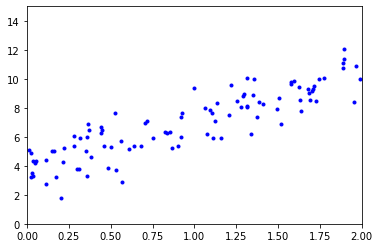

In [1]:
# 임의의 데이터 생성

import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

X_b = np.c_[np.ones((100, 1)), X] # x0=1을 각 instance에 추가(x0 column 추가)

In [2]:
# Batch Gradient Descent
import numpy as np

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[3.78760826]
 [3.3220427 ]]


In [3]:
# Normal Equation
theta_ne = np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), np.dot(X_b.T, y))
print(theta_ne)

[[3.78760826]
 [3.3220427 ]]


위의 결과에서, Normal Equation과 Gradient Descent의 $\hat{\mathbf{\theta}}$이 같으므로 잘 동작한다는 것을 알 수 있다.

이제 eta의 값에 따른 Gradient Descent의 과정을 살펴보자. 

다음의 코드는 eta값이 각각 0.02, 0.1, 0.5일 때 Gradient Descent의 10 step을 출력한다. 각 step의 결과는 파란 실선이고 시작점은 붉은 점선이다.

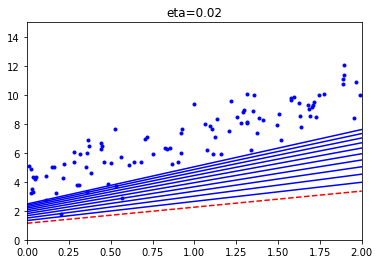

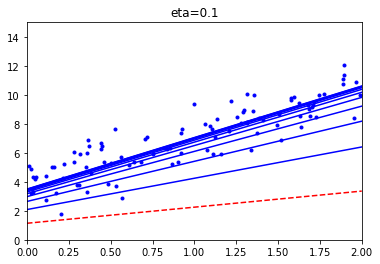

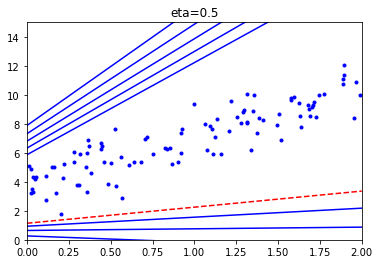

In [4]:
import numpy as np
import matplotlib.pyplot as plt

etas = [0.02, 0.1, 0.5]
n_iterations = 10
m = 100

theta_start = np.random.randn(2, 1)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

for i, eta in enumerate(etas):
    theta = theta_start
    plt.plot(X, y, 'b.')
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred, 'r--')
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        y_pred = X_new_b.dot(theta)
        plt.plot(X_new, y_pred, "b-")
    
    plt.title(f"eta={eta}")
    plt.axis([0, 2, 0, 15])
    plt.show()

첫번째는 learning rate가 매우 작은 경우이다. 알고리즘이 결국은 solution에 도달하겠지만, 오랜 시간이 걸린다. 두번째는 learning rate가 적절한 경우이다. 몇번의 iteration만으로 solution에 도달하였다. 세번째는 learning rate가 매우 큰 경우이다. 알고리즘이 diverge하는 것을 보여준다.

적절한 learning rate값을 찾기 위해 grid search를 사용한다면, convergence까지 오랜 시간이 걸리는 모델이 있을 수 있으므로, iteration을 제한해야 한다. 하지만, iteration을 작게 설정하면, solution에 도달하기 전에 멈출 수 있으며, 반대로 크게 설정하면, model parameter의 변화 없이 오랜 시간을 소비하는 경우가 있을 수 있다.

위와 같은 경우의 간단한 솔루션은 아주 큰 iteration을 설정한 후, gradient vector가 매우 작아지는 경우에 알고리즘을 멈추도록 하는 것이다. 따라서, 아주 작은 tolerance 값 $\epsilon$을 설정해 gradient vector의 norm이 이 값보다 작다면, Gradient Descent가 minimum에 거의 근접했다고 판단하고 학습을 멈추면 된다.

## Stochastic Gradient Descent

**Stochastic Gradient Descent**는 각 step마다 gradient를 계산하기 위해 random하게 선택된 하나의 instance를 사용한다. 따라서 알고리즘의 속도가 매우 빠르고, 아주 큰 training set의 경우에도 학습을 시킬 수 있다는 장점이 있다.

하지만 반대로 stochastic(random)하다는 특징 때문에 Batch Gradient Descent에 비해 규칙적이지 못하다. 따라서, cost function이 minimum에 converge하는 과정이 부드럽지 못하고 요동치며 평균적으로 감소하는 모습을 띄게 된다. 이는 minimum에 안정적으로 정착하지 못하게 하므로, 알고리즘이 멈춘 후의 결과가 optimal solution이 아닌 optimal solution에 근사한 값이 되도록 한다.
(아래 그림 참고)

<br/>
<img src="./images/stochastic_gradient_descent.png" alt="stochastic_gradient_descent" width="60%"> 
<br/>

cost function이 매우 불규칙하게 되면, 알고리즘이 local minimum에서 벗어나는데 도움이 되므로, Batch Gradient Descent에 비해 Stochastic Gradient Descent가 global minimum을 찾을 확률이 높다.

정리하자면, randomness는 local minimum의 탈출에 도움이 되지만, optimal solution을 찾지 못하게 된다.

이 딜레마를 해결하기 위한 방법 중 하나는 learning rate를 점진적으로 감소시키는 것이 있다. 이는 큰 step으로 시작해 local minimum들을 벗어난 후, step이 점차 작아지며 global minima에 정착하게 하는 것이다. 이 방법에서 각 iteration의 learning rate를 결정하는 함수를 **learning schedule**이라고 한다.

아래 코드는 간단한 learning schedule을 사용한 Stochastic Gradient Descent를 구현한 것이다.

In [5]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients

print(theta)

[[3.78143715]
 [3.30988983]]


Stochastic Gradient Descent는 50번의 epoch만으로도 괜찮은 solution에 도달다는 것을 알 수 있다. 또한, 위 코드에서 m번의 iteration을 여러번 반복한 것을 볼 수 있는데, 이 반복을 **epoch**이라고 부른다.

학습 과정이 불규칙적인 것을 확인하기 위해 20번 step(epoch)동안의 과정을 그려보면 다음과 같다. (불규칙적인 것을 더 잘 보기위해 learning schedule을 적용하지 않았음)

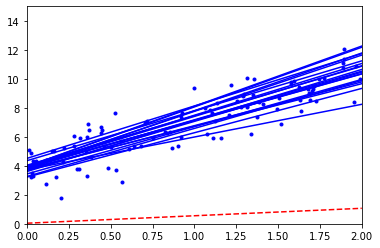

In [6]:
import numpy as np
import matplotlib.pyplot as plt

eta=0.1
n_epochs = 20
theta = np.random.randn(2, 1)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

plt.plot(X, y, 'b.')
y_pred = X_new_b.dot(theta)
plt.plot(X_new, y_pred, 'r--')

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
    
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred, "b-")
    
plt.axis([0, 2, 0, 15])
plt.show()

위 결과를 통해 학습 과정이 매우 불규칙하다는 것을 확인할 수 있다.

Stochastic Gradient Descent에서는 instance가 무작위로 선택되므로, 선택되지 않는 instance가 있을 수 있다. 이를 방지하기 위해 각 instance의 선택마다 shuffle을 해줄 수도 있지만, 이는 convergence를 느리게 한다.

사이킷런에서는 SGD를 이용한 Linear Regression에 `SGDRegressor` class를 사용하며, 이 함수는 기본적으로 squared error cost function을 optimizing한다.

아래 예제는 1000번의 epoch(`max_iter=1000`)으로 $10^{-3}$보다 작은 loss감소까지(`tol=1e-3`) 수행하며, learning rate는 0.1에서 시작하고(`eta0=0.1`), default learning schedule을 사용한다. 또한, regularization은 사용하지 않았다.(`penalty=None`)

In [7]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, penalty=None)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.83687503]), array([3.40306399]))

## Mini-batch Gradient Descent

**Mini-batch Gradient Descent**는 각 step마다 gradient의 계산에 **mini-batch**라고 부르는 instance의 작은 random set을 사용한다. Stochastic GD에 비해  Mini-batch GD의 주요 장점은 Matrix operation에 최적화된 하드웨어, 특히 GPU를 통해 성능을 향상시킬 수 있다는 것이다.

알고리즘의 parameter space에서의 progress는 SGD에 비해 덜 불규칙적이다. 따라서, SGD에 비해 minimum에 더 가까이 접근하지만, 반대로 local minimum에서 벗어나기가 더 어렵다.

아래 그림은 3가지 Gradient Descent 알고리즘의 training시 parameter space를 나타낸 것이다.

<br/>
<img src="./images/comparison_of_gradient_descents.png" alt="comparison_of_gradient_descents" width="80%"> 
<br/>

지금까지 살펴본 알고리즘들의 Linear Regression에 대한 비교는 다음과 같다.

**Comparison of algorithms for Linear Regression**

| Algorithm       | Large m(instances) | Large n(features) | Out-of-core support | Hyperparameters | Scaling required |
| :-------------: | :----------------: | :---------------: | :-----------------: | :-------------: | :--------------: |
| Normal Equation | Fast               | Slow              | No                  | 0               | No               |
| SVD             | Fast               | Slow              | No                  | 0               | No               |
| Batch GD        | Slow               | Fast              | No                  | 2               | Yes              |
| Stochastic GD   | Fast               | Fast              | Yes                 | $\geq 2$        | Yes              |
| Mini-batch GD   | Fast               | Fast              | Yes                 | $\geq 2$        | Yes              |